[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/codebysumit/100-days-of-deep-learning-challenge/blob/master/Day%201/Iris_flower_classification_using_perceptron.ipynb)

# Important Dependencies

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import os
import cv2
from PIL import Image

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import Perceptron

# Helper function

In [ ]:
from IPython.display import display, HTML, Math

def load_mathjax():
    display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
                 "latest.js?config=default'></script>"))
    display(Math(""))  # This line is neccessary. Do not remove it!

get_ipython().events.register('pre_run_cell', load_mathjax)

In [ ]:
def plot_perceptron(perceptron, input_data, output_data, target_names, output_path = None):
  image = io.imread('https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiHUzRCe4QjlQqZiA6quDOLxCy_XJXotFmIJOWjIzYVeLJ9pOfcrp7hieQZrWB2aSLarMGMtACjF1aW89KxWfbQQH5X_IvydhZ5TnjShVLPyuz3c6MJ6EmA6Hz9-_UFdovFvQ6Z9RxJJZV1ItCZ3BiXMsk8YzLdvMl-KeNKxvevBSiWWDtWduIQ3jfMpA/s16000/template.png')
  plt.imshow(image)
  plt.axis('off')

  # Features Lable
  plt.text(46, 58, 'Sepal Length', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(46, 118, 'Sepal Width', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(46, 178, 'Petal Length', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(46, 238, 'Petal Width', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')


  # Inputs Data
  plt.text(151, 58, f'{input_data[0]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(151, 118, f'{input_data[1]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(151, 178, f'{input_data[2]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(151, 238, f'{input_data[3]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')

  # Weights Data
  W = perceptron.coef_[0]
  plt.text(246, 58, f'{W[0]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(246, 118, f'{W[1]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(246, 178, f'{W[2]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(246, 238, f'{W[3]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')

  # Bias Data
  B = perceptron.intercept_[0]
  plt.text(246, 298, f'{B:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')

  # Summation Unit
  plt.text(650, 10, f"$Z = ({W[0]:.1f} \\cdot {input_data[0]:.1f}) + ({W[1]:.1f} \\cdot {input_data[1]:.1f}) + ({W[2]:.1f} \\cdot {input_data[2]:.1f}) + ({W[3]:.1f} \\cdot {input_data[3]:.1f}) + ({B:.1f})$\n", color='black', fontsize=10, ha='center', va='center')

  sum = 0
  for i in range(4):
    sum += W[i] * input_data[i]
  sum += B

  plt.text(360, 110, f'$Z = {sum:.1f}$', color='black', fontsize=10, fontweight='bold', ha='center', va='center')

  # Stap Function
  y_hat = 1 if sum >= 0 else 0
  plt.text(500, 110, '$f(Z) = \\hat{y} = ' + str(y_hat) +'$', color='black', fontsize=10, fontweight='bold', ha='center', va='center')


  # Result
  predict = perceptron.predict([input_data])[0]
  if predict == output_data:
    plt.text(600, 178, f'{predict}', color='#297d9e', fontsize=15, fontweight='bold', ha='center', va='center')
    plt.text(720, 178, f'({target_names[predict]})', color='#297d9e', fontsize=15, fontweight='bold', ha='center', va='center')

  if output_path != None:
    plt.savefig(output_path, bbox_inches='tight', dpi=600)
  plt.show()

In [ ]:
def plot_perceptron_2f(perceptron, input_data, output_data, target_names, output_path = None):
  image = io.imread('https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiHUzRCe4QjlQqZiA6quDOLxCy_XJXotFmIJOWjIzYVeLJ9pOfcrp7hieQZrWB2aSLarMGMtACjF1aW89KxWfbQQH5X_IvydhZ5TnjShVLPyuz3c6MJ6EmA6Hz9-_UFdovFvQ6Z9RxJJZV1ItCZ3BiXMsk8YzLdvMl-KeNKxvevBSiWWDtWduIQ3jfMpA/s16000/template.png')
  plt.imshow(image)
  plt.axis('off')

  # Features Lable
  plt.text(46, 58, 'Sepal Length', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(46, 178, 'Petal Length', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')

  # Inputs Data
  plt.text(151, 58, f'{input_data[0]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(151, 178, f'{input_data[1]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')


  # Weights Data
  W = perceptron.coef_[0]
  plt.text(246, 58, f'{W[0]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(246, 178, f'{W[1]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')

  # Bias Data
  B = perceptron.intercept_[0]
  plt.text(246, 298, f'{B:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')

  # Summation Unit
  plt.text(650, 10, f"$Z = ({W[0]:.1f} \\cdot {input_data[0]:.1f}) + ({W[1]:.1f} \\cdot {input_data[1]:.1f}) + ({B:.1f})$\n", color='black', fontsize=10, ha='center', va='center')

  sum = 0
  for i in range(2):
    sum += W[i] * input_data[i]
  sum += B

  plt.text(360, 110, f'$Z = {sum:.1f}$', color='black', fontsize=10, fontweight='bold', ha='center', va='center')

  # Stap Function
  y_hat = 1 if sum >= 0 else 0
  plt.text(500, 110, '$f(Z) = \\hat{y} = ' + str(y_hat) +'$', color='black', fontsize=10, fontweight='bold', ha='center', va='center')


  # Result
  predict = perceptron.predict([input_data])[0]
  if predict == output_data:
    plt.text(600, 178, f'{predict}', color='#297d9e', fontsize=15, fontweight='bold', ha='center', va='center')
    plt.text(720, 178, f'({target_names[predict]})', color='#297d9e', fontsize=15, fontweight='bold', ha='center', va='center')

  if output_path != None:
    plt.savefig(output_path, bbox_inches='tight', dpi=600)
  plt.show()

# Load and overview datasets

![Iris Flower](https://media2.dev.to/dynamic/image/width=1000,height=420,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Farticles%2F2tcrzxvzwfn64ru9jb5p.png)

In [ ]:
# Load the Iris dataset
iris = load_iris()

In [1]:
# print(iris)

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print('Features:', iris['feature_names'])
# print('1st raw of the dataset:', iris['data'][0])

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Print the target names (species)
print("Target names:", iris.target_names)

Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


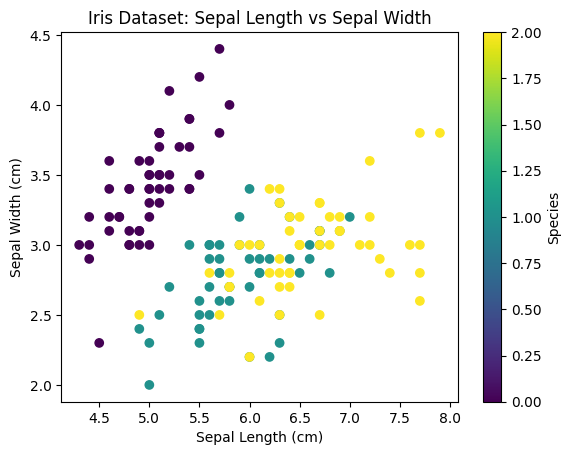

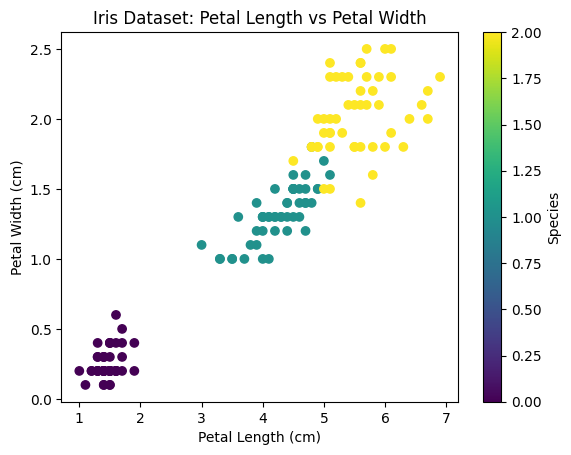

In [ ]:
# Create a scatter plot of sepal length vs sepal width
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris.target, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()


# Create a scatter plot of petal length vs petal width
plt.scatter(iris_df['petal length (cm)'].values, iris_df['petal width (cm)'].values, c=iris.target, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.colorbar(label='Species')
plt.show()

In [ ]:
print(iris['data'][:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


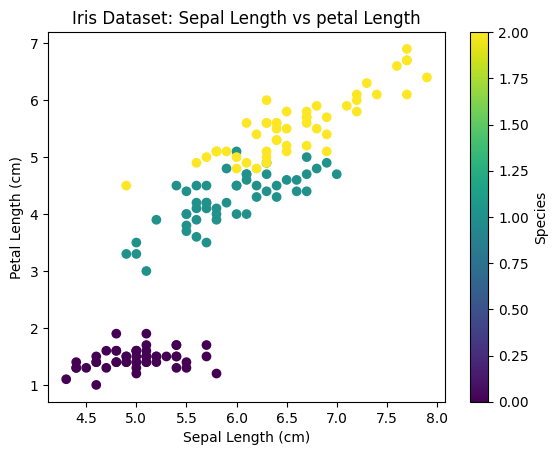

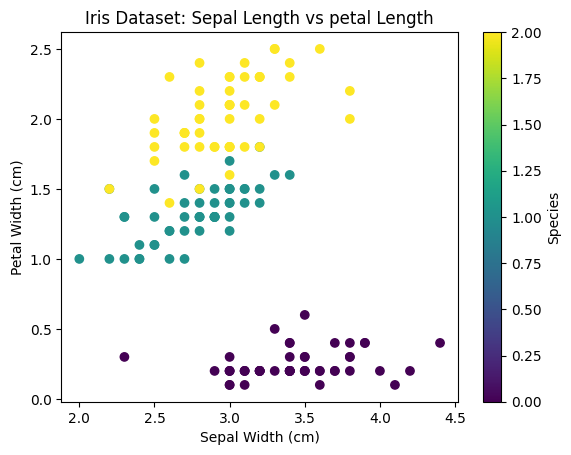

In [ ]:
x_points = iris['data'][:, [0, 2]][:, 0]
y_points = iris['data'][:, [0, 2]][:, 1]

plt.scatter(x_points, y_points, c=iris['target'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Dataset: Sepal Length vs petal Length')
plt.colorbar(label='Species')
plt.show()

x_points = iris['data'][:, [1, 3]][:, 0]
y_points = iris['data'][:, [1, 3]][:, 1]

plt.scatter(x_points, y_points, c=iris['target'], cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs petal Length')
plt.colorbar(label='Species')
plt.show()

# Drop any one Species from the Dataset (make it binary calcification dataset)

In [ ]:
iris_df['prediction'] = iris.target

In [ ]:
iris_df = iris_df[iris_df.prediction != 2]

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


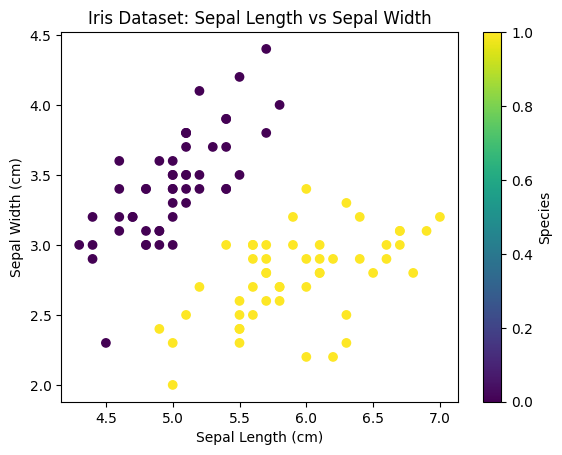

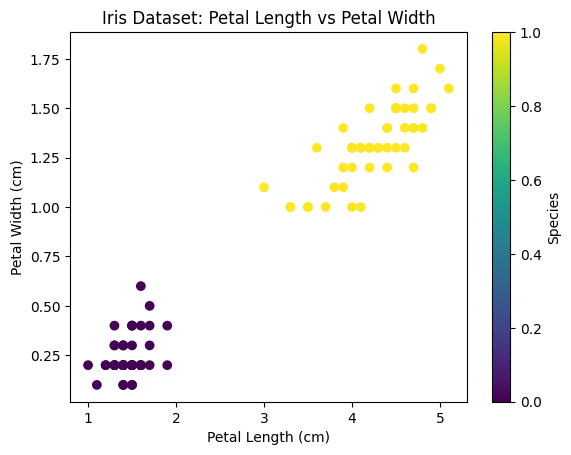

In [ ]:
# Create a scatter plot of sepal length vs sepal width
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['prediction'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()


# Create a scatter plot of petal length vs petal width
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['prediction'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.colorbar(label='Species')

plt.show()

# Visualizing the data using T-SNE (t-distributed Stochastic Neighbor Embedding)

In [ ]:
tsne_df = iris_df.drop('prediction', axis=1)
tsne_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
tsne_data = tsne_df.to_numpy()

In [ ]:
print(type(tsne_data))
print(tsne_data[0])

<class 'numpy.ndarray'>
[5.1 3.5 1.4 0.2]


In [ ]:
tsne = TSNE()
tsne_res = tsne.fit_transform(tsne_data)

In [ ]:
print(type(tsne_res))
print(tsne_res[0])

<class 'numpy.ndarray'>
[-7.3323717  9.305658 ]


In [ ]:
print(tsne_res[:, 0])

[-7.3323717 -4.9822845 -5.4904323 -4.9925356 -7.2977486 -8.666242
 -5.8153787 -6.663041  -4.485864  -5.369404  -8.559798  -6.021417
 -4.862813  -4.6262045 -9.604368  -9.548754  -8.95581   -7.3061304
 -9.241239  -7.938902  -8.34429   -7.6594863 -6.3655043 -6.4917483
 -5.700226  -5.080519  -6.5951457 -7.66014   -7.5049214 -5.4010763
 -5.1954174 -8.266486  -8.716495  -9.308217  -5.4287443 -6.2457075
 -8.691578  -7.1027303 -4.6922884 -6.9679675 -7.0957117 -3.8673763
 -5.109502  -6.8228407 -7.7891335 -4.8801475 -7.960774  -5.2996926
 -8.284847  -6.4242606  8.65542    8.845839   8.444881   7.5784373
  8.071517   8.585473   9.096101   7.4372344  8.20792    8.303071
  7.401492   8.448711   6.8407183  8.360087   8.146409   8.712582
  9.027361   7.6152143  6.9572196  7.5201845  9.393665   7.6580777
  7.394403   8.0497     8.193177   8.492074   8.033269   8.1480465
  8.510432   7.2042394  7.481199   7.388296   7.6382585  7.3955417
  9.207546   9.321646   8.570464   7.0406284  8.548844   7.924355


In [ ]:
print(tsne_res[:, 1])

[  9.305658    8.816203    8.062102    8.1684265   9.365401   10.617208
   7.8847094   9.279027    7.7589593   8.935993    9.91064     9.266698
   8.559179    7.3278284  10.336876   10.794875   10.316932    9.484673
  10.068153   10.299354    9.210253   10.178836    7.3650274  10.231594
  10.013696    9.307925    9.872719    9.518096    9.140096    8.651621
   8.951385    9.251212   10.866345   10.721764    8.94055     8.441276
   9.321522    8.771644    7.6094546   9.37616     8.962081    7.9935613
   7.485175   10.392908   10.963947    8.567973   10.392015    7.984996
   9.942584    8.950809  -10.109872   -9.074751  -10.115195   -5.480185
  -9.2004     -7.0985026  -9.044306   -4.170926   -9.384259   -5.1845927
  -4.273261   -7.310756   -6.1396565  -8.424976   -5.2385383  -9.567198
  -7.153769   -6.356421   -8.228891   -5.6136417  -8.358      -7.084252
  -9.005453   -8.34651    -8.691056   -9.314406   -9.842765  -10.014062
  -7.9636917  -5.1263175  -5.238544   -5.061317   -6.1162996  

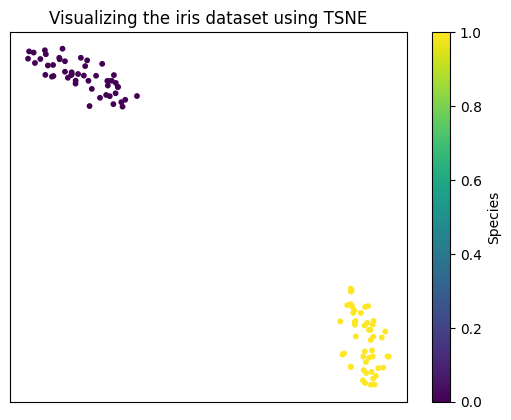

In [ ]:
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=iris_df['prediction'], cmap='viridis', s=10)
plt.title('Visualizing the iris dataset using TSNE')
plt.xticks([])
plt.yticks([])
plt.colorbar(label='Species')
plt.show()

# Perceptron

In [ ]:
temp_df = iris_df.drop('prediction', axis=1)
temp_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X, y = temp_df.to_numpy(), iris_df['prediction'].to_numpy()

In [ ]:
print('X:', X[0])
print('y:', y[0])

X: [5.1 3.5 1.4 0.2]
y: 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train', X_train[0])
print('y_train:', y_train[0])

X_train [5.7 2.8 4.5 1.3]
y_train: 1


In [ ]:
print('Size of train data:', X_train.shape[0])
print('Size of test data:', X_test.shape[0])

Size of train data: 80
Size of test data: 20


In [ ]:
model = Perceptron()

In [ ]:
model.fit(X_train, y_train)

Perceptron()

In [ ]:
print('Weights: ', model.coef_)

Weights:  [[-1.3 -4.5  6.8  3.1]]


In [ ]:
print('Biases: ', model.intercept_)

Biases:  [-1.]


In [ ]:
print(X_train[0])
print(X_train[:, [0, 2]][0])

[5.7 2.8 4.5 1.3]
[5.7 4.5]


In [ ]:
predict = model.predict([X_test[0]])

In [ ]:
print('Prediction:', predict[0])
print('Actual class:', y_test[0])

Prediction: 1
Actual class: 1


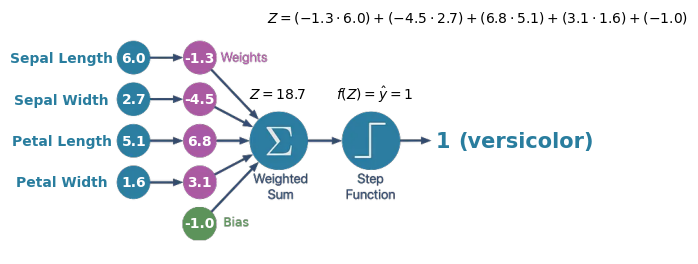

In [ ]:
plot_perceptron(model ,X_test[0], y_test[0], iris.target_names[:2])

# Perceptron accuracy checking

In [ ]:
# Making prediction on test data
y_pred = model.predict(X_test)
# Finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
cm_array = confusion_matrix(y_test, y_pred)

In [ ]:
# cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_array, display_labels = iris.target_names[:2])
# cm_display.plot()
# plt.title('hbhh')
# plt.show()

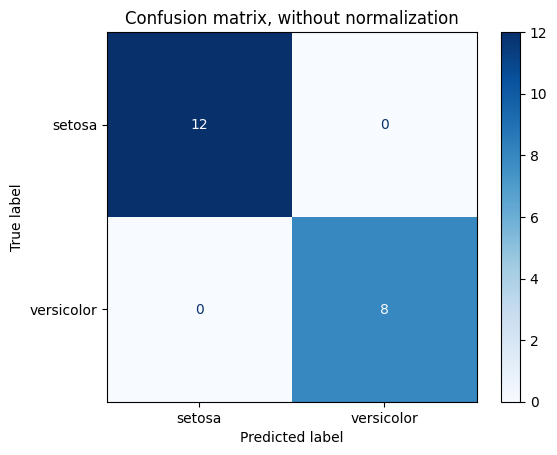

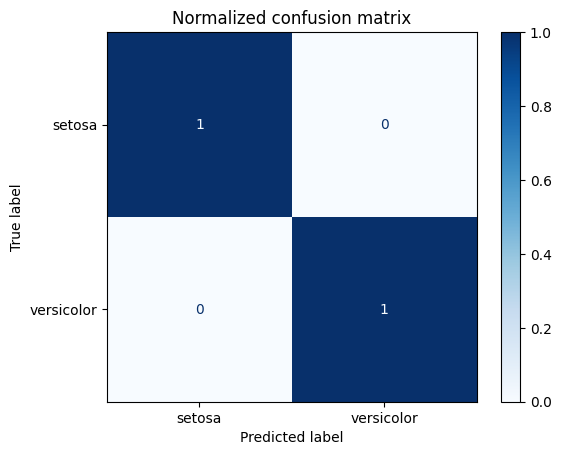

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=iris.target_names[:2],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    # print(title)
    # print(disp.confusion_matrix)

plt.show()

# Save Prediction video

In [ ]:
!mkdir frames

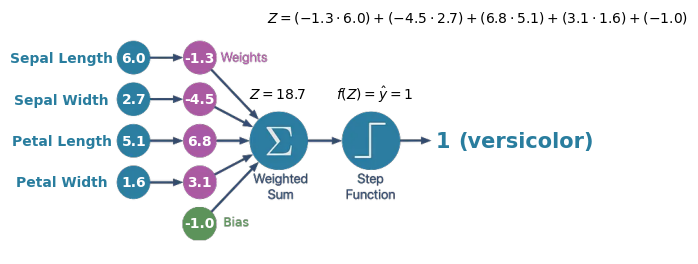

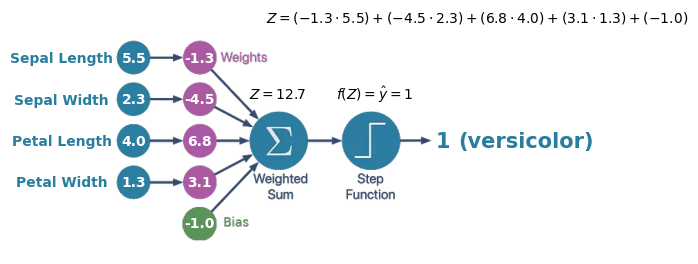

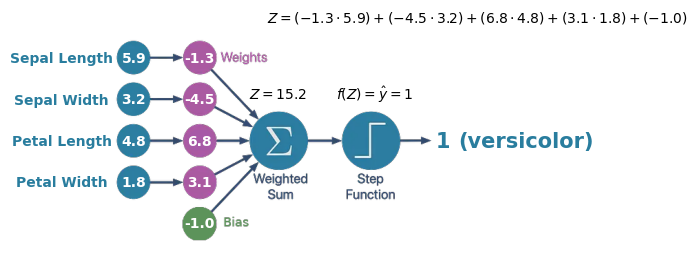

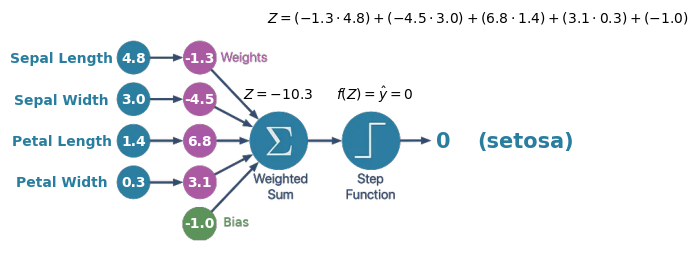

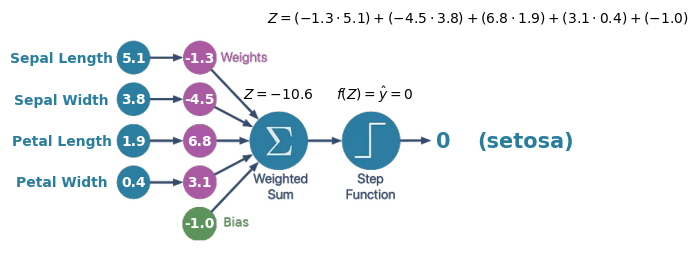

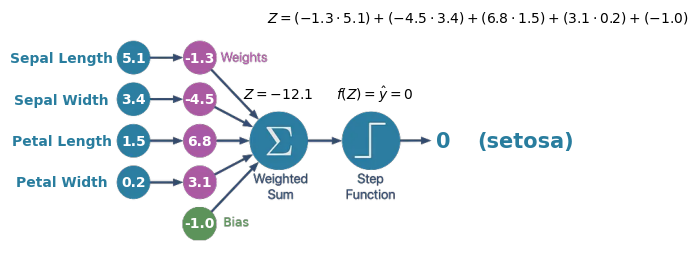

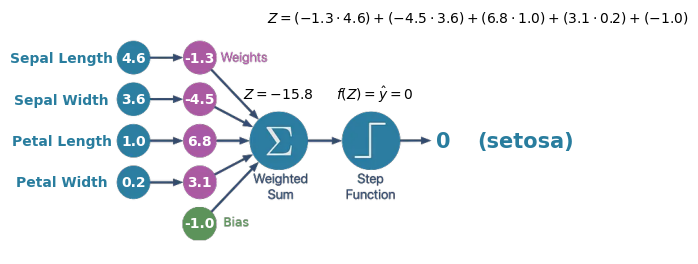

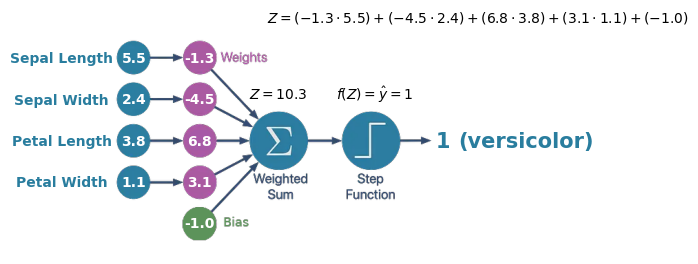

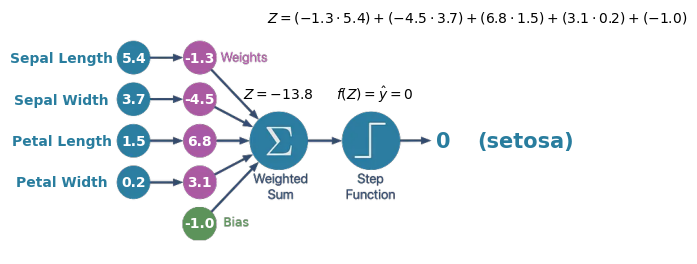

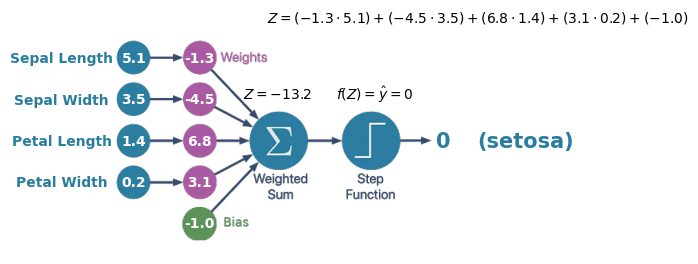

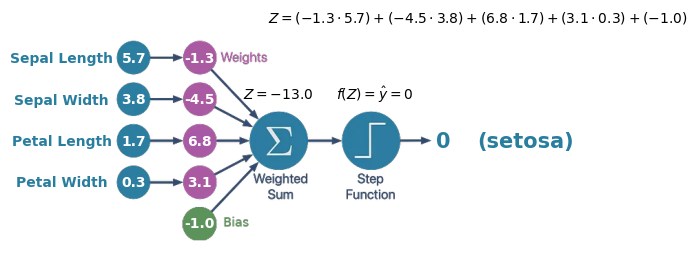

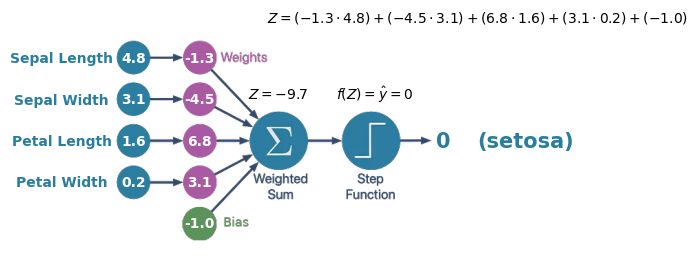

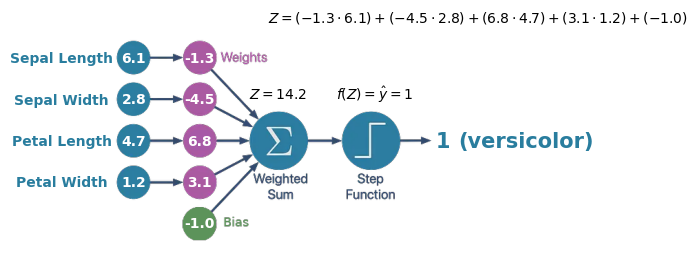

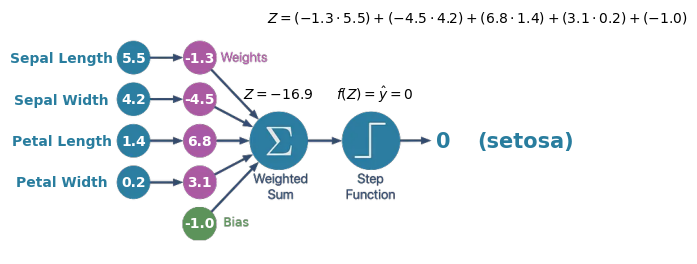

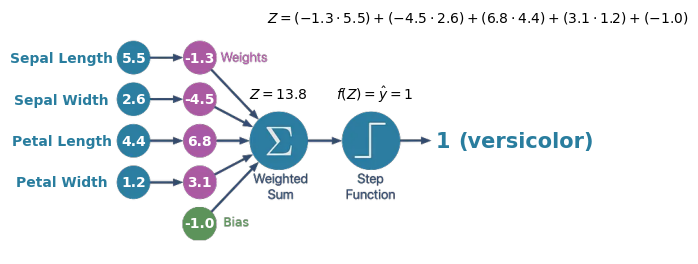

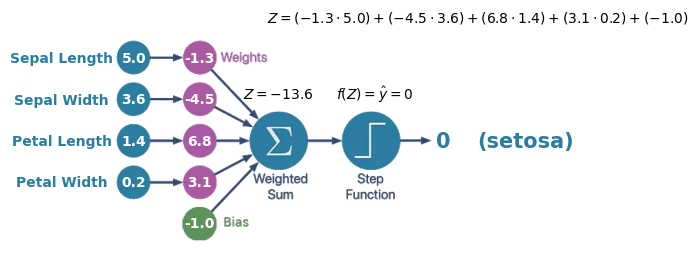

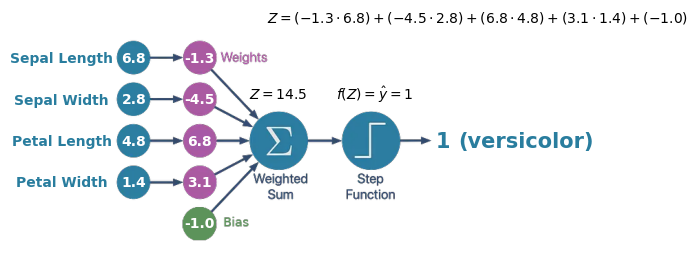

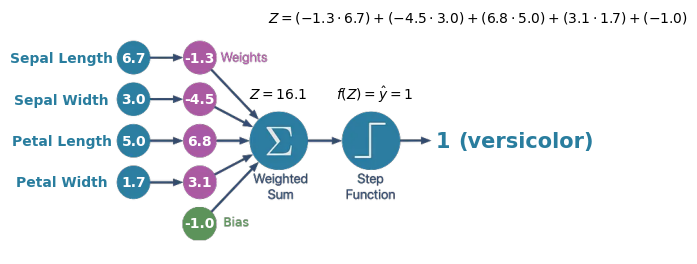

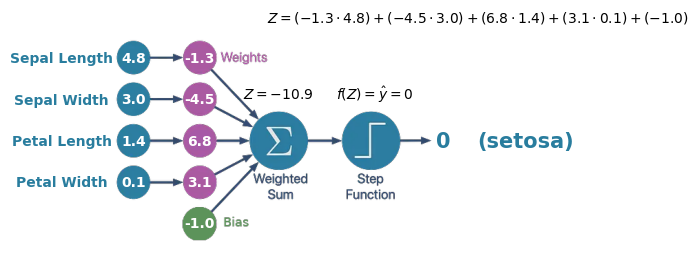

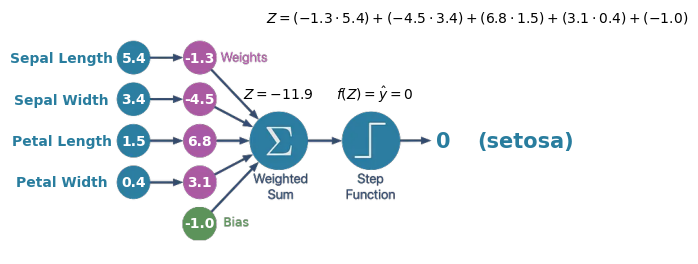

In [ ]:
images = []
dir_path = '/content/frames'
for i in range(X_test.shape[0]):
  plot_perceptron(model ,X_test[i], y_test[i], iris.target_names, os.path.join(dir_path, f'{i}.png'))
  images.append(str(os.path.join(dir_path, f'{i}.png')))

In [ ]:
print('Total images:', len(images))

Total images: 20


In [ ]:
# Calculating the mean width and height of all images
mean_width = 0
mean_height = 0
num_of_images = len(images)

for file in images:
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(file)
        width, height = im.size
        mean_width += width
        mean_height += height

# Averaging width and height
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)

# Resizing all images to the mean width and height
for file in images: # Iterate through the list of image paths
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(file) # Use the full file path
        # Use Image.LANCZOS instead of Image.ANTIALIAS for downsampling
        im_resized = im.resize((mean_width, mean_height), Image.Resampling.LANCZOS) # Corrected resampling filter
        im_resized.save(file, 'PNG') # Save as PNG since the input was PNG
        print(f"{file} is resized")

/content/frames/0.png is resized
/content/frames/1.png is resized
/content/frames/2.png is resized
/content/frames/3.png is resized
/content/frames/4.png is resized
/content/frames/5.png is resized
/content/frames/6.png is resized
/content/frames/7.png is resized
/content/frames/8.png is resized
/content/frames/9.png is resized
/content/frames/10.png is resized
/content/frames/11.png is resized
/content/frames/12.png is resized
/content/frames/13.png is resized
/content/frames/14.png is resized
/content/frames/15.png is resized
/content/frames/16.png is resized
/content/frames/17.png is resized
/content/frames/18.png is resized
/content/frames/19.png is resized


In [ ]:
# Function to generate video
def generate_video(images, output_dir):
    video_name = os.path.join(output_dir, 'a.avi')

    print("Images:", images)

    # Set frame from the first image
    frame = cv2.imread(images[0])
    height, width, layers = frame.shape

    # Video writer to create .avi file
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'XVID'), 1, (width, height))

    # Appending images to video
    for image in images:
        video.write(cv2.imread(image))

    # Release the video file
    video.release()
    cv2.destroyAllWindows()
    print("Video generated successfully!")

# Calling the function to generate the video
generate_video(images, '/content/')

Images: ['/content/frames/0.png', '/content/frames/1.png', '/content/frames/2.png', '/content/frames/3.png', '/content/frames/4.png', '/content/frames/5.png', '/content/frames/6.png', '/content/frames/7.png', '/content/frames/8.png', '/content/frames/9.png', '/content/frames/10.png', '/content/frames/11.png', '/content/frames/12.png', '/content/frames/13.png', '/content/frames/14.png', '/content/frames/15.png', '/content/frames/16.png', '/content/frames/17.png', '/content/frames/18.png', '/content/frames/19.png']
Video generated successfully!


In [ ]:
!ffmpeg -i a.avi -c:v copy -c:a copy OUTPUT.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

# Plot decision regions

In [ ]:
# temp_df = iris_df.drop(['sepal width (cm)', 'petal width (cm)', 'prediction',], axis=1)
# temp_df.head()

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = iris_df.iloc[:, [0, 2]].values
y = iris_df.iloc[:, -1].values

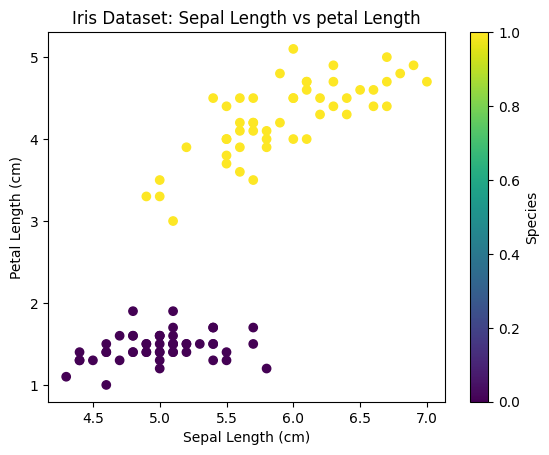

In [ ]:
x_points = X[:, 0]
y_points = X[:, 1]

plt.scatter(x_points, y_points, c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Dataset: Sepal Length vs petal Length')
plt.colorbar(label='Species')
plt.show()

In [ ]:
p = Perceptron()
p.fit(X, y)

Perceptron()

In [ ]:
print('Weights: ', p.coef_)
print('Biases: ', p.intercept_)

Weights:  [[-5.  10.9]]
Biases:  [-2.]


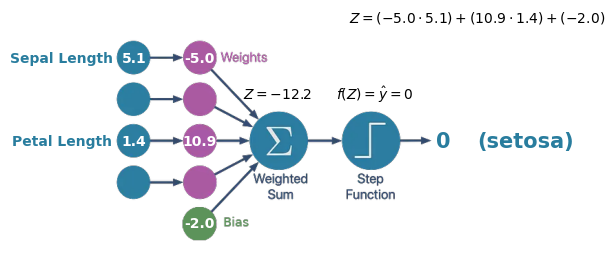

In [ ]:
plot_perceptron_2f(p ,X[0], y[0], iris.target_names[:2])

In [ ]:
a = p.coef_[0][0]
b = p.coef_[0][1]
c = p.intercept_[0]

formula = "(" + f"{a:.1f}" + " × X_{i}) + (" + f"{b:.1f}" + " × Y_{i}) + " + f"({c:.1f})" + " = 0$"
display(Math(formula))
print("")

formula = "Y_{i} = " + f"({-(a/b):.2f})" + "X_{i}+" + f"({-c/b:.2f})" + "$"
display(Math(formula))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

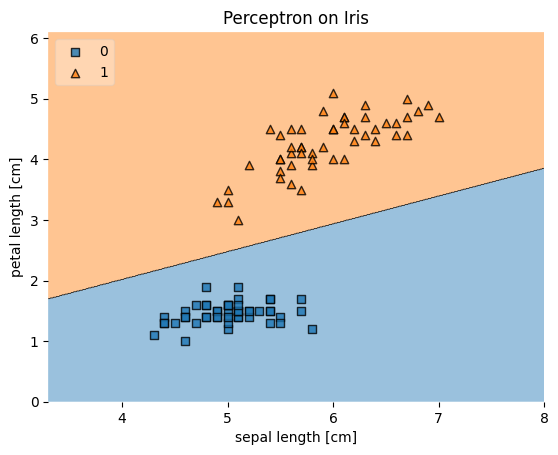

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X, y, clf=p, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron on Iris')
plt.show()